# Discussion Section 7

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load data
disaster = pd.read_csv('data/disaster.csv - disaster.csv')

disaster.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
# Cleaning text data
def preprocess(text):
    # Make all of the text in the `text` column lowercase
    text = text.lower()
    # Remove all of the leading and trailing white spaces in the `text` column
    text=  text.strip() 
    # Remove html syntax
    text=  re.sub(r'<.*?>','', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]','',text) # adding the r before the string tells the program we mean these strings as they are
    # Remove reference numbers
    text = re.sub(r'\[[0-9]*\]',' ',text)
    # Removing digits
    text = re.sub(r'\d',' ',text)  
    # Collapsing multiple spaces into a single space
    text = re.sub(r'\s+', ' ', text) 
    return text

In [14]:
# Apply string cleaning to text variable
disaster['clean_text'] = disaster['text'].apply(preprocess)
disaster.head()

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


In [11]:
# Proof that Tfidf vectorizer excludes stopwords
stop_words = ["On March 5th, I will crush my capstone presentation with my awesome team."]

vectorizer_english = TfidfVectorizer(stop_words = "english")
X_english = vectorizer_english.fit_transform(stop_words)

print("Remaining words:")
print(vectorizer_english.get_feature_names_out())

Remaining words:
['5th' 'awesome' 'capstone' 'crush' 'march' 'presentation' 'team']


## Logistic Regression

In [16]:
# Split into test and train
X_train, X_test, y_train, y_test = train_test_split(disaster['clean_text'], disaster['target'], test_size = 0.3, random_state = 42)

In [17]:
# Vectorize words
tfidf_vectorizer = TfidfVectorizer(stop_words = "english")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [18]:
# Initialize a logistic regression model and fit to vectorized training data
lr_model = LogisticRegression(random_state = 42)
lr_model.fit(X_train_tfidf, y_train)
y_pred = lr_model.predict(X_test_tfidf)

## Logistic Regression Results

Accuracy: 0.803415061295972


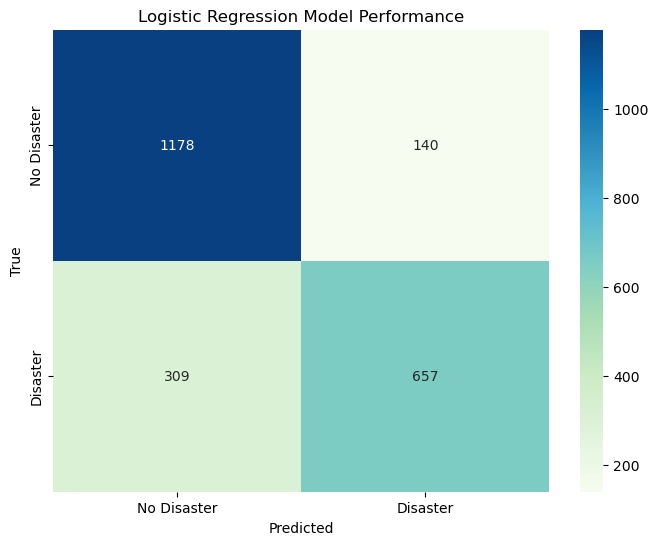

In [19]:
# Calculate LR accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Create confusion matrix for correctly/incorrectly predicting outcome variable 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "GnBu",
           xticklabels = ["No Disaster", "Disaster"],
           yticklabels = ["No Disaster", "Disaster"])
plt.title("Logistic Regression Model Performance")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Test Model with New Data

In [27]:
new_text = [
    "BREAKING: Massive earthquake hits the coast",
    "I love watching disasters movies on Netflix",
    "Thousands evacuated as hurricane approaches",
    "Theeeeessss is a disastttttteeerrrr",
    "It's windy!",
    "The Palisades wildfire has damaged over 7,000 structures",
    "I broke my tooth on a jawbreaker",
    "Dozens of towns warned of impending thunderstorms that may bring tornados"
]

# Preprocess new phrases
cleaned_new_text = [preprocess(text) for text in new_text]

# Transform using TF-IDF vectorizer
new_features = tfidf_vectorizer.transform(cleaned_new_text)

# Make predictions
predictions = lr_model.predict(new_features)

# Check outcomes
for text,pred in zip(new_text, predictions):
    print(f"Text: {text}")
    print(f"Predicitons: {'Real Disaster' if pred == 1 else 'Not a Real Disaster'}\n")

Text: BREAKING: Massive earthquake hits the coast
Predicitons: Real Disaster

Text: I love watching disasters movies on Netflix
Predicitons: Not a Real Disaster

Text: Thousands evacuated as hurricane approaches
Predicitons: Real Disaster

Text: Theeeeessss is a disastttttteeerrrr
Predicitons: Not a Real Disaster

Text: It's windy!
Predicitons: Not a Real Disaster

Text: The Palisades wildfire has damaged over 7,000 structures
Predicitons: Real Disaster

Text: I broke my tooth on a jawbreaker
Predicitons: Not a Real Disaster

Text: Dozens of towns warned of impending thunderstorms that may bring tornados
Predicitons: Not a Real Disaster

